In [1]:
### Import necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pylab 

%matplotlib inline
from scipy import stats

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest

# EDA

## Reading Loan Data Set

In [2]:
loandf =pd.read_csv("./loan.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False, encoding = "latin-1",parse_dates=['issue_d'])
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### View the dimensions of the dataframe to get an idea about the dataset

In [3]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loandf.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [5]:
loandf.shape

(39717, 111)

##### Identifying missing data

In [6]:
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

**Check for NA values in dataset**

In [7]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

## Perform Data Cleanup


In [8]:
loandf = loandf.dropna(axis=1, how='all')

**Check the % of NAs columnwise**

In [9]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### Identify the columns having 50% or more null values and remove such columns

In [10]:
loandf = loandf.dropna(thresh=len(loandf) * 0.5, axis=1)

In [11]:
loandf.shape

(39717, 54)

In [12]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
sum(loandf.duplicated(subset = "id")) == 0

True

Creating Loan Period as a derived variable from term column as Numeric variable

In [14]:
loandf['loanPeriod'] = loandf['term'].str[1:4].astype(int)
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loanPeriod
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60


Create a derived attribute zip_code_num based on column zip_code which contain only numeric value.

In [15]:
loandf["zip_code_num"] = loandf["zip_code"].str.replace('x','')
loandf["zip_code_num"] = loandf["zip_code_num"].astype(int)

Identify the unique value counts in the dataframe

In [16]:
loandf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

Remove columns with only 1 uniques value as it will not add much value to analysis

In [17]:
loandf = loandf.loc[:, loandf.nunique() != 1]

Check the dimensions of the dataframe once again

In [18]:
loandf.shape

(39717, 47)

Drop few columns 'emp_title', 'url' ,'desc', 'title', 'zip_code', 'term' as it does not add much value for the analysis

In [19]:
loandf = loandf.drop([ 'emp_title', 'url' ,'desc', 'title', 'zip_code', 'term'], axis=1)

View dataframe

In [20]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

##### Verify column earliest_cr_line -The month the borrower's earliest reported credit line was opened

In [21]:
loandf['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

##### As this information does not add much value for our analysis we can drop this column

In [22]:
loandf = loandf.drop(['earliest_cr_line'],axis =1)

In [23]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

#### As the dataset contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

##### Here we need to identify and understand which consumer attributes and loan attributes influence the tendency of default.

#### We will analyze all customer and loan attribute and find the impact of this attribute on loan status, whether fully paid or defaulted


          Verify the loan status and count the number of records for each status. 
          Here Status Charged Off corresponds to loan default

In [24]:
loandf['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#####   Pie Chart for  distribution of loan status

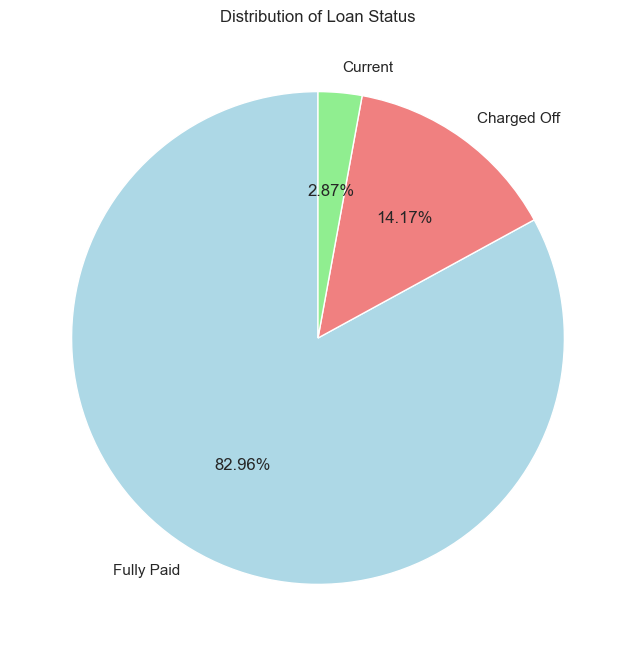

In [25]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 8))
loan_status_counts = loandf['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.2f%%', startangle=90, colors=[ 'lightblue','lightcoral','lightgreen'])
plt.title('Distribution of Loan Status')
plt.show()

View the dataSet for loan purpose and find number of record for each purpose

In [26]:
loandf['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

#####   Countplot for loan Purpose

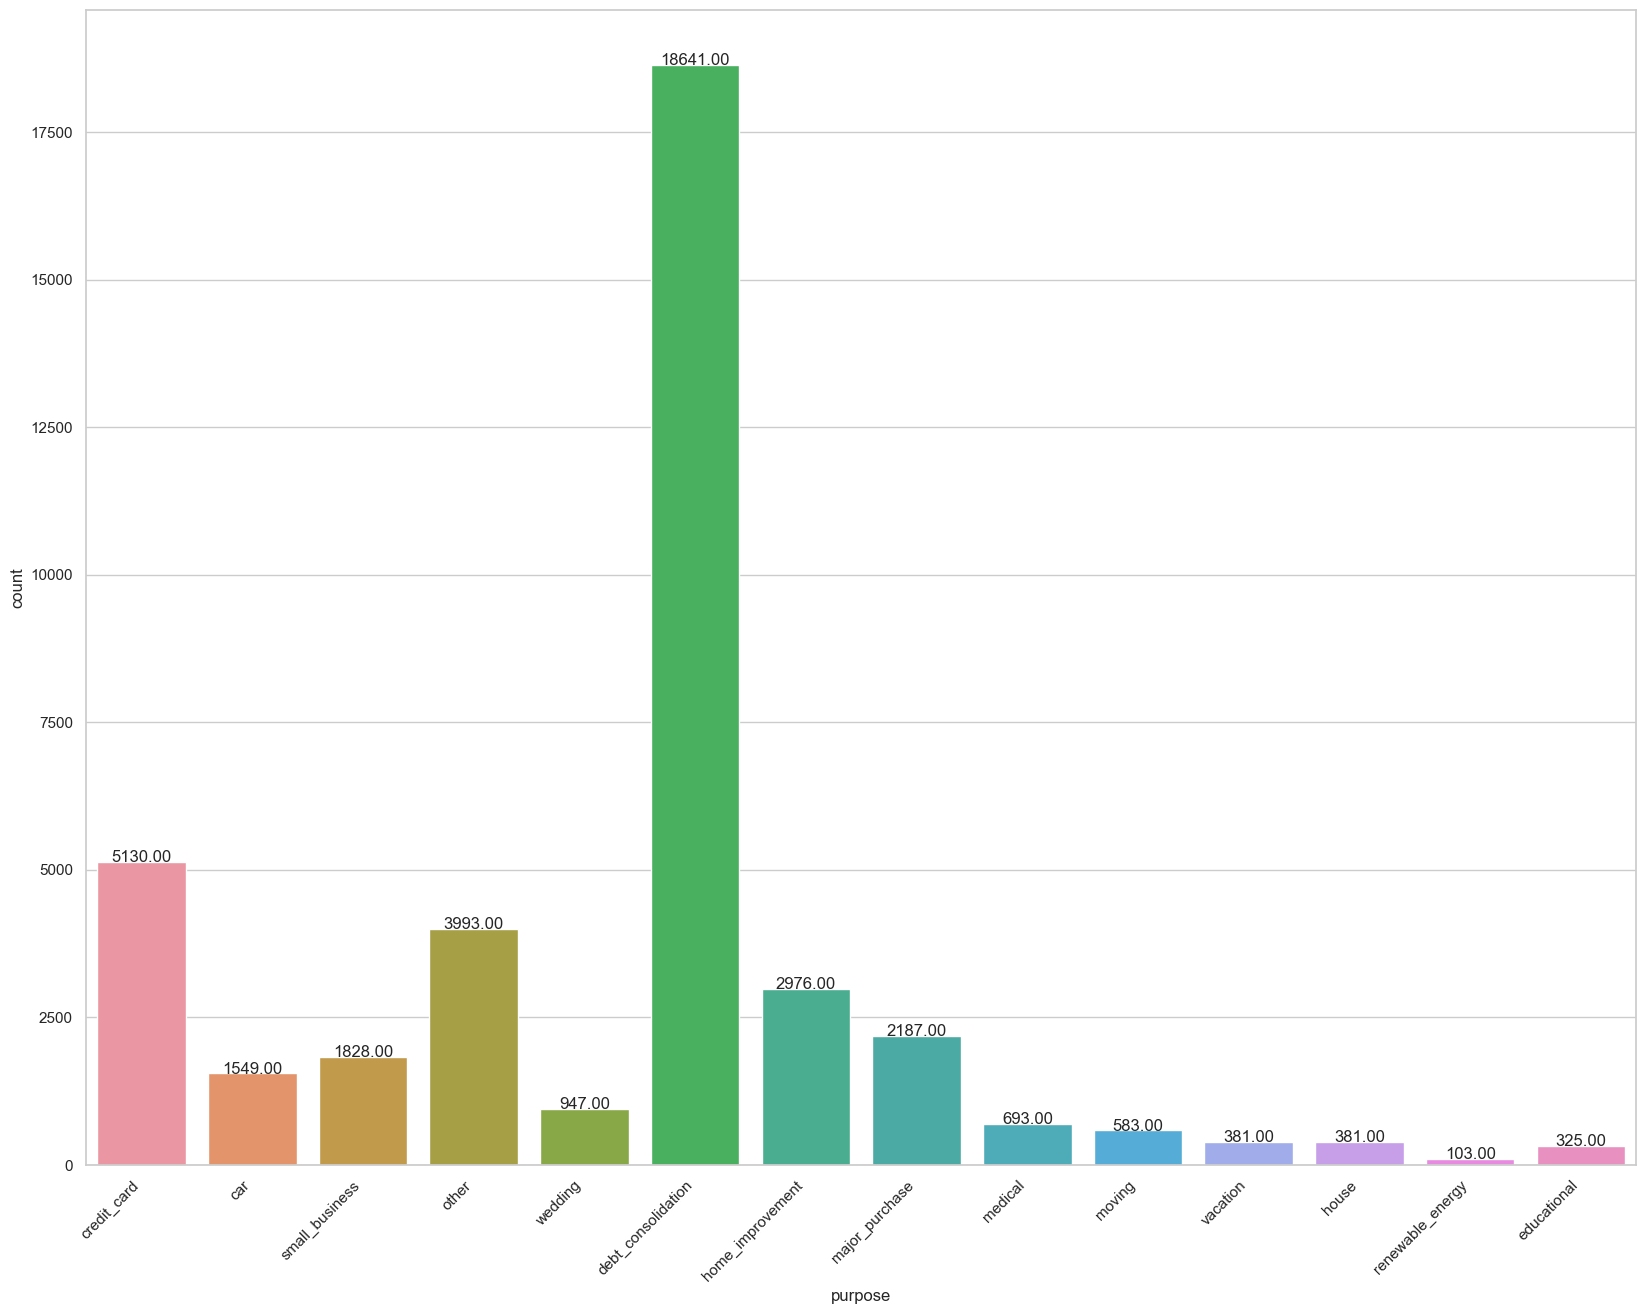

In [27]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(x="purpose", data=loandf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:1.2f}'.format(height), ha="center")

plt.show()

###   Lets check how loan purpose impacts the loan status

#### Create pivot table loandf_purpose from given loan dataset for Loan status and Loan Purpose

In [28]:
loandf_purpose = pd.pivot_table(loandf, values='loan_amnt', index='purpose', columns='loan_status', aggfunc='count')
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,NaN,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


###   Perform data cleaning for pivot table loandf_purpose

#### Replace the NaN value with 0

In [29]:
loandf_purpose.loc[pd.isnull(loandf_purpose['Current']), ['Current']] = 0
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,0.0,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


#### Adding new columns Aggregate and percentage of loan for each status for given purpose to pivot table 

In [30]:
loandf_purpose['Aggregate'] = loandf_purpose['Charged Off'] + loandf_purpose['Current'] + loandf_purpose['Fully Paid']
loandf_purpose['Charged Off%'] = round(loandf_purpose['Charged Off']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Current%'] = round(loandf_purpose['Current']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Fully Paid %'] = round(loandf_purpose['Fully Paid']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
purpose,,,,,,,
car,160.0,50.0,1339.0,1549.0,10.33,3.23,86.44
credit_card,542.0,103.0,4485.0,5130.0,10.57,2.01,87.43
debt_consolidation,2767.0,586.0,15288.0,18641.0,14.84,3.14,82.01
educational,56.0,0.0,269.0,325.0,17.23,0.00,82.77
home_improvement,347.0,101.0,2528.0,2976.0,11.66,3.39,84.95
house,59.0,14.0,308.0,381.0,15.49,3.67,80.84
major_purchase,222.0,37.0,1928.0,2187.0,10.15,1.69,88.16
medical,106.0,12.0,575.0,693.0,15.30,1.73,82.97
moving,92.0,7.0,484.0,583.0,15.78,1.20,83.02


#### Barplot for loan purpose for percentage of loan charged off ( Defaulted)

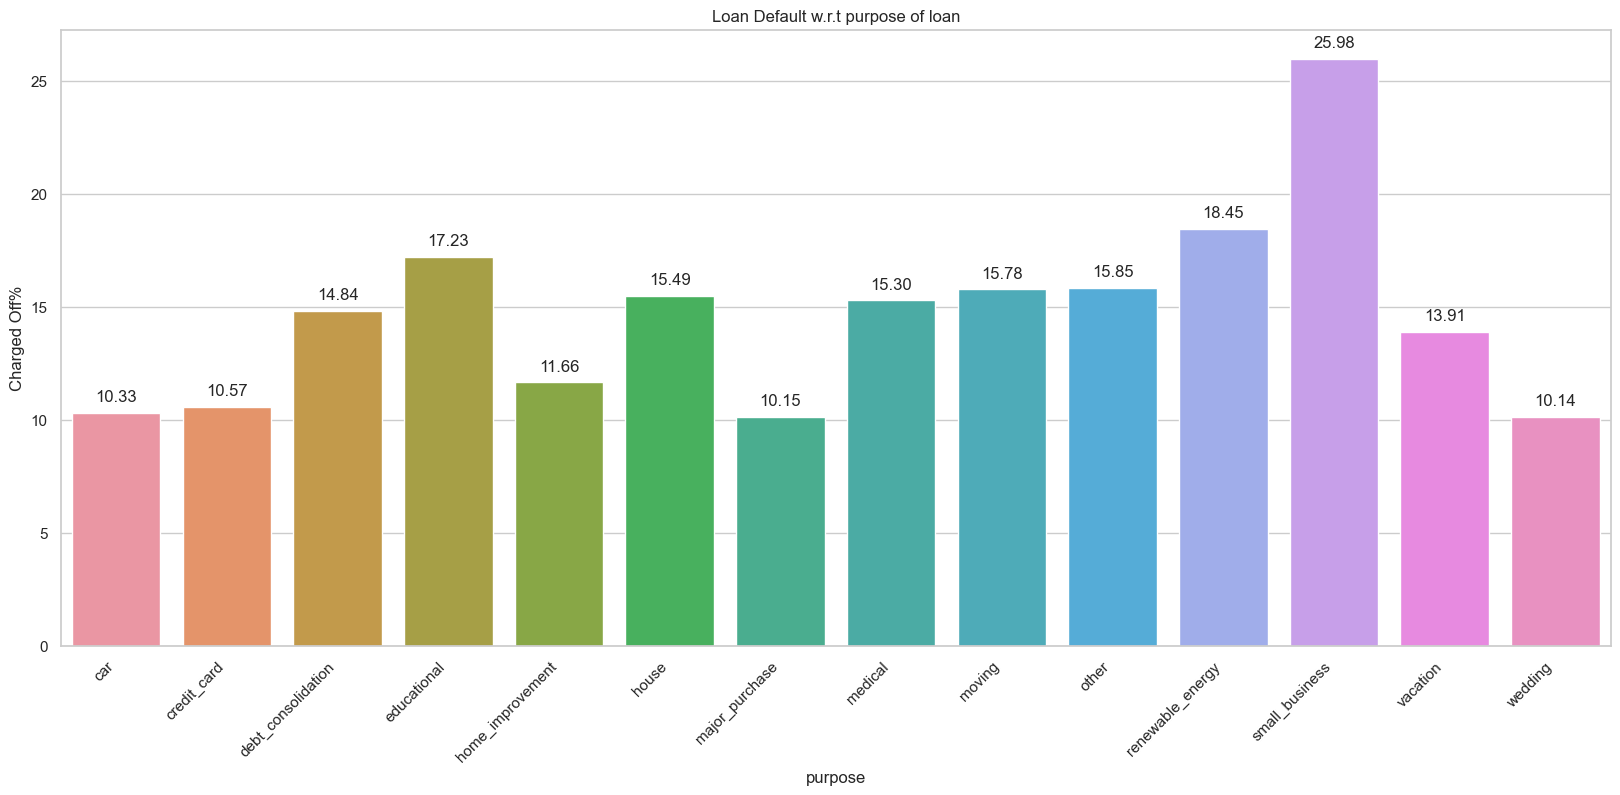

In [31]:
plt.figure(figsize=(20, 8))
plt.title('Loan Default w.r.t purpose of loan')
ax=sns.barplot(x='purpose',y = "Charged Off%", data=loandf_purpose.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 

###            From the above bar chat, loan for small_business contribute highest number of loan Default followed by renewable_energy

Verify the dataSet for loan period and find number of record for each period
Values are in months and can be either 36 or 60.

In [32]:
loandf['loanPeriod'].value_counts()

36    29096
60    10621
Name: loanPeriod, dtype: int64

#### Countplot for loan period based on loan status

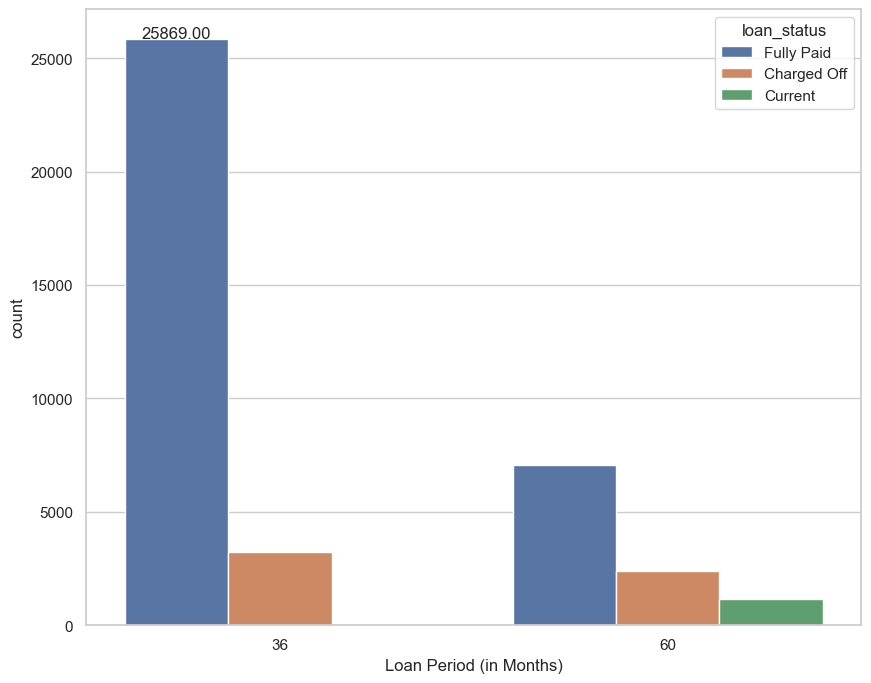

In [33]:
from matplotlib.pyplot import show
plt.figure(figsize=(10, 8))
ax=sns.countplot(x = "loanPeriod", hue = "loan_status", data = loandf)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 
    ax.set_xlabel("Loan Period (in Months)")
    show()



#### Create Pivot table loandf_duration for the attribute loan period and loan status, which will help us analyze the impact of loan period on loan status

In [34]:
loandf_duration = pd.pivot_table(loandf, values='loan_amnt', index='loanPeriod', columns='loan_status', aggfunc='count')
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,NaN,25869.0
60,2400.0,1140.0,7081.0


#### Convert NaN value in Pivot table to 0

In [35]:
loandf_duration.loc[pd.isnull(loandf_duration['Current']), ['Current']] = 0
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,0.0,25869.0
60,2400.0,1140.0,7081.0


#### Adding new columns Aggregate for aggregate number of loan for each duration and percentage of loan for each status for given duration to pivot table 

In [36]:
loandf_duration['Aggregate'] = loandf_duration['Charged Off'] + loandf_duration['Current'] + loandf_duration['Fully Paid']
loandf_duration['Charged Off%'] = round(loandf_duration['Charged Off']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Current%'] = round(loandf_duration['Current']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Fully Paid %'] = round(loandf_duration['Fully Paid']/loandf_duration['Aggregate'] *100, 2)


loandf_duration

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loanPeriod,,,,,,,
36,3227.0,0.0,25869.0,29096.0,11.09,0.00,88.91
60,2400.0,1140.0,7081.0,10621.0,22.60,10.73,66.67


#### Pie Chart for loan purpose for percentage of loan charged off ( Defaulted)

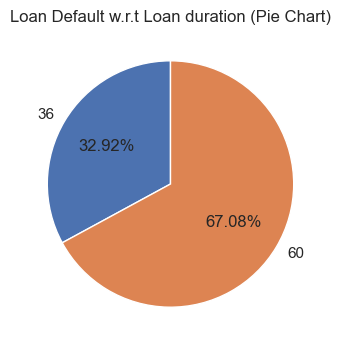

In [37]:
plt.figure(figsize=(6, 4))
plt.title('Loan Default w.r.t Loan duration')
ax = sns.barplot(x='loanPeriod', y="Charged Off%", data=loandf_duration.reset_index(), estimator=np.median)
 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.25, '{:1.2f}'.format(height), ha="center")
 

labels = loandf_duration.reset_index()['loanPeriod'].tolist()
sizes = [p.get_height() for p in ax.patches]
 

total = sum(sizes)
sizes = [(size / total) * 100 for size in sizes]
 

plt.clf()  
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Loan Default w.r.t Loan duration (Pie Chart)')
 

plt.show()



    Check the dataSet for dti and find the impact loan status based on dti range 
    
 ##### Create new derived attribute dti_level for bucketing dti range
 
 Here dti  indicates - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [38]:
def dti_level(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "A(<5)"
    elif 5 <= x < 10:
        return "B(5-10)"
    elif 10 <= x < 15:
        return "C(10-15)"
    elif 15 <= x < 20:
        return "D(15-20)"
    else:
        return "E(>20)"

loandf['dti_level'] = loandf.dti.apply(lambda x: dti_level(x))

In [39]:
loandf['dti_level'].value_counts()

C(10-15)    9893
D(15-20)    9108
B(5-10)     8062
E(>20)      7514
A(<5)       5140
Name: dti_level, dtype: int64

#### Create Pivot table loandf_dti for the attribute dti and loan status, which will help us analyze the impact of dti on loan status
#### Adding new columns Aggregate for aggregate number of loan for each dti_level and loan status to pivot table 

In [40]:
loandf_dti = pd.pivot_table(loandf, values='loan_amnt', index='dti_level', columns='loan_status', aggfunc='count')
loandf_dti['Aggregate'] = loandf_dti['Charged Off'] + loandf_dti['Current'] + loandf_dti['Fully Paid']
loandf_dti['Charged Off%'] = round(loandf_dti['Charged Off']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Current%'] = round(loandf_dti['Current']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Fully Paid %'] = round(loandf_dti['Fully Paid']/loandf_dti['Aggregate'] *100, 2)
loandf_dti

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
dti_level,,,,,,,
A(<5),625,96,4419,5140,12.16,1.87,85.97
B(5-10),1001,201,6860,8062,12.42,2.49,85.09
C(10-15),1399,269,8225,9893,14.14,2.72,83.14
D(15-20),1394,284,7430,9108,15.31,3.12,81.58
E(>20),1208,290,6016,7514,16.08,3.86,80.06


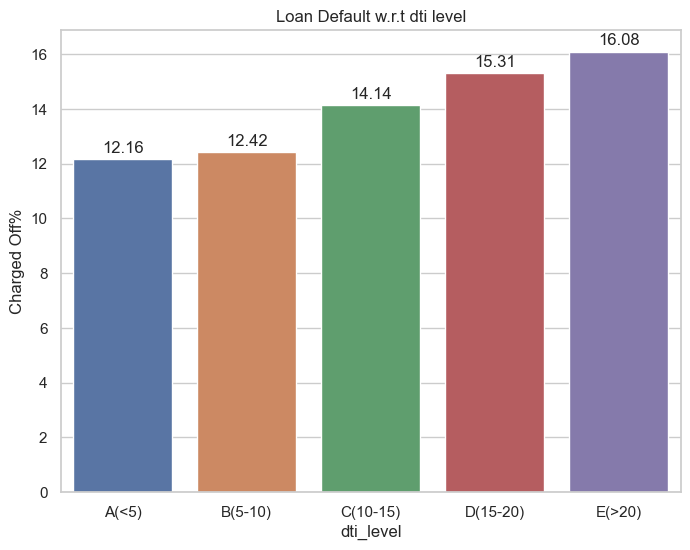

In [41]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t dti level')
ax=sns.barplot(x='dti_level',y = "Charged Off%", data=loandf_dti.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 

###     From the above bar chart, chance for loan default increases with increase in dti level 

In [42]:
loandf['total_acc'].value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

    Lets check the impact of total_acc on loan default
    Here total_acc indicates the total number of credit lines currently in the borrower's credit file.

### Aggregate the 10 or more total_acc into one called 10+

In [43]:
loandf['total_acc'] = loandf['total_acc'].apply(lambda x: x if x< 10 else '10+')

In [44]:
loandf_total_acc = pd.pivot_table(loandf, values='loan_amnt', index='total_acc', columns='loan_status', aggfunc='count')
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid
total_acc,,,
2,1.0,NaN,3.0
3,42.0,3.0,137.0
4,79.0,5.0,336.0
5,91.0,9.0,452.0
6,107.0,9.0,567.0
7,132.0,15.0,681.0
8,172.0,17.0,817.0
9,166.0,24.0,890.0
10+,4837.0,1058.0,29067.0


#### Create Pivot table loandf_total_acc for the attribute total_acc and loan_status, which will help us analyze the impact of total_acc on loan status
#### Convert the NaN value to 0
#### Adding new columns Aggregate for aggregate number of total_acc for each loan_status and percentage of total_acc for each loan_status to pivot table 

In [45]:
loandf_total_acc.loc[pd.isnull(loandf_total_acc['Current']), ['Current']] = 0
loandf_total_acc['Aggregate'] = loandf_total_acc['Charged Off'] + loandf_total_acc['Current'] + loandf_total_acc['Fully Paid']
loandf_total_acc['Charged Off%'] = round(loandf_total_acc['Charged Off']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Current%'] = round(loandf_total_acc['Current']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Fully Paid %'] = round(loandf_total_acc['Fully Paid']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
total_acc,,,,,,,
2,1.0,0.0,3.0,4.0,25.00,0.00,75.00
3,42.0,3.0,137.0,182.0,23.08,1.65,75.27
4,79.0,5.0,336.0,420.0,18.81,1.19,80.00
5,91.0,9.0,452.0,552.0,16.49,1.63,81.88
6,107.0,9.0,567.0,683.0,15.67,1.32,83.02
7,132.0,15.0,681.0,828.0,15.94,1.81,82.25
8,172.0,17.0,817.0,1006.0,17.10,1.69,81.21
9,166.0,24.0,890.0,1080.0,15.37,2.22,82.41
10+,4837.0,1058.0,29067.0,34962.0,13.84,3.03,83.14


 home_ownership - The home ownership status provided by the borrower during registration. The available values are: RENT, OWN, MORTGAGE, OTHER.

    Lets check the impact of home_ownership on loan default

In [46]:
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Combine NONE into OTHER category

In [47]:
loandf['home_ownership'] = loandf['home_ownership'].apply(lambda x: x if x != 'NONE' else 'OTHER')
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of loan_status for each home_ownership

In [48]:
loandf_home_ownership = pd.pivot_table(loandf, values='loan_amnt', index='home_ownership', columns='loan_status', aggfunc='count')
loandf_home_ownership.loc[pd.isnull(loandf_home_ownership['Current']), ['Current']] = 0
loandf_home_ownership['Aggregate'] = loandf_home_ownership['Charged Off'] + loandf_home_ownership['Current'] + loandf_home_ownership['Fully Paid']
loandf_home_ownership['Charged Off%'] = round(loandf_home_ownership['Charged Off']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Current%'] = round(loandf_home_ownership['Current']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Fully Paid %'] = round(loandf_home_ownership['Fully Paid']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
home_ownership,,,,,,,
MORTGAGE,2327.0,638.0,14694.0,17659.0,13.18,3.61,83.21
OTHER,18.0,0.0,83.0,101.0,17.82,0.00,82.18
OWN,443.0,83.0,2532.0,3058.0,14.49,2.71,82.80
RENT,2839.0,419.0,15641.0,18899.0,15.02,2.22,82.76


    Lets check the impact of annual income with loan default status
    Here, annual_inc is the self-reported annual income provided by the borrower during registration.

In [49]:
print(loandf.annual_inc.max())
print(loandf.annual_inc.min())

6000000.0
4000.0


### Apply bucketing for Annual income

In [50]:
def sal_range(x):
    'divide the time of the day into four categories'
    if x < 10000:
        return "A(<10K)"
    elif 10000 <= x < 20000:
        return "B(10K-20K)"
    elif 20000 <= x < 50000:
        return "C(20K-50K)"
    elif 50000 <= x < 750000:
        return "D(50K-75K)"
    elif 75000 <= x < 100000:
        return "E(75K-100K)"
    else:
        return "F(>100K)"

loandf['salary_range'] = loandf.annual_inc.apply(lambda x: sal_range(x))  
loandf['salary_range'].value_counts()


D(50K-75K)    24998
C(20K-50K)    13621
B(10K-20K)      986
A(<10K)          80
F(>100K)         32
Name: salary_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of losalary_range for each loan_status

In [51]:
loandf_salary_range = pd.pivot_table(loandf, values='loan_amnt', index='salary_range', columns='loan_status', aggfunc='count')
loandf_salary_range.loc[pd.isnull(loandf_salary_range['Current']), ['Current']] = 0
loandf_salary_range['Aggregate'] = loandf_salary_range['Charged Off'] + loandf_salary_range['Current'] + loandf_salary_range['Fully Paid']
loandf_salary_range['Charged Off%'] = round(loandf_salary_range['Charged Off']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Current%'] = round(loandf_salary_range['Current']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Fully Paid %'] = round(loandf_salary_range['Fully Paid']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
salary_range,,,,,,,
A(<10K),14.0,1.0,65.0,80.0,17.50,1.25,81.25
B(10K-20K),213.0,7.0,766.0,986.0,21.60,0.71,77.69
C(20K-50K),2222.0,319.0,11080.0,13621.0,16.31,2.34,81.34
D(50K-75K),3175.0,813.0,21010.0,24998.0,12.70,3.25,84.05
F(>100K),3.0,0.0,29.0,32.0,9.38,0.00,90.62


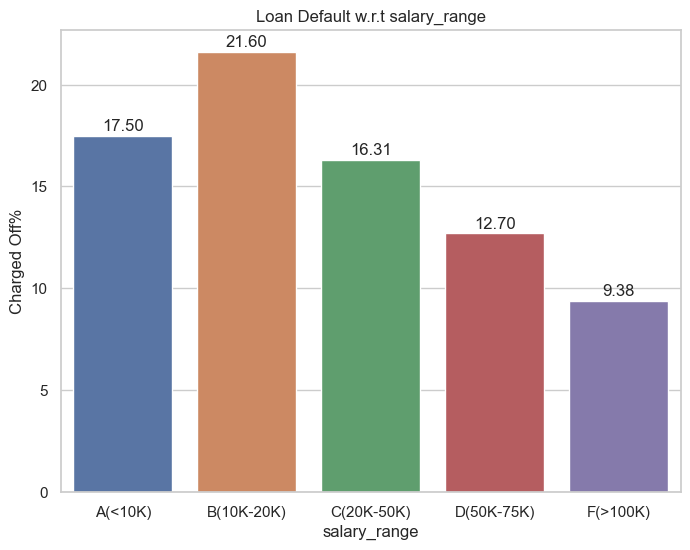

In [52]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t salary_range')
ax=sns.barplot(x= 'salary_range',y = "Charged Off%", data=loandf_salary_range.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 

From the above bar chart we can see that for salary range 10,000 to 20,000 there are more chances of defaulting the loan

Interest Rates
Lets check the impact of Interest Rate on the loan on loan default

Convert int_rate to int_rate% as float from string and find the minimum and maximum values

In [53]:
loandf['int_rate%'] = loandf['int_rate'].str[:-1].astype(float)

print(loandf['int_rate%'].max())
print(loandf['int_rate%'].min())

24.59
5.42


apply bucketing for int_rate%

In [54]:
def int_rate(x):
    'Create int_rate range'
    if x < 10:
        return "A(<10%)"
    elif 10 <= x < 15:
        return "B(10%-15%)"
    elif 15 <= x < 20:
        return "C(15%-20%)"
    else:
        return "D(>20%)"

loandf['int_rate_range'] = loandf['int_rate%'].apply(lambda x: int_rate(x))  
loandf['int_rate_range'].value_counts()

B(10%-15%)    19045
A(<10%)       12142
C(15%-20%)     7658
D(>20%)         872
Name: int_rate_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of int_rate_range for each loan_status

In [55]:
loandf_int_rate_range = pd.pivot_table(loandf, values='loan_amnt', index='int_rate_range', columns='loan_status', aggfunc='count')
loandf_int_rate_range['Aggregate'] = loandf_int_rate_range['Charged Off'] + loandf_int_rate_range['Current'] + loandf_int_rate_range['Fully Paid']
loandf_int_rate_range['Charged Off%'] = round(loandf_int_rate_range['Charged Off']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range['Current%'] = round(loandf_int_rate_range['Current']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range['Fully Paid %'] = round(loandf_int_rate_range['Fully Paid']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range


loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
int_rate_range,,,,,,,
A(<10%),799,75,11268,12142,6.58,0.62,92.80
B(10%-15%),2738,531,15776,19045,14.38,2.79,82.84
C(15%-20%),1794,432,5432,7658,23.43,5.64,70.93
D(>20%),296,102,474,872,33.94,11.70,54.36


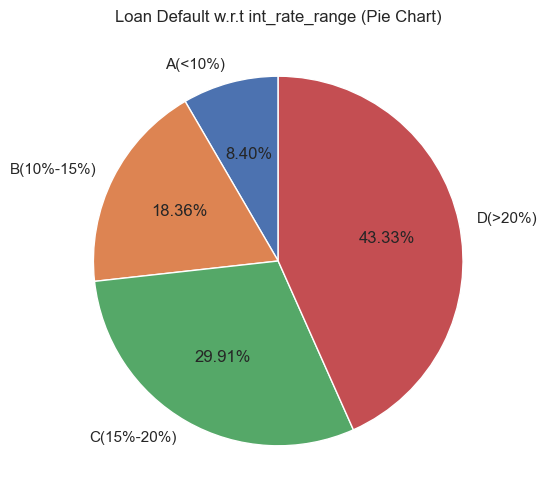

In [56]:
# Your existing data and plot code
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t int_rate_range')
ax = sns.barplot(x='int_rate_range', y="Charged Off%", data=loandf_int_rate_range.reset_index())

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.2f}'.format(height), ha="center")

# Extract data from the bar plot
labels = loandf_int_rate_range.reset_index()['int_rate_range'].tolist()
sizes = [p.get_height() for p in ax.patches]

# Convert the bar plot data into percentages
total = sum(sizes)
sizes = [(size / total) * 100 for size in sizes]

# Create a pie chart
plt.clf()  # Clear the existing figure
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Loan Default w.r.t int_rate_range (Pie Chart)')

# Display the pie chart
plt.show()

Loan Amt
  Lets check the impact of loan amount on chance of loan default

In [57]:
print(loandf['loan_amnt'].max())
print(loandf['loan_amnt'].min())

35000
500


APPLY BUCKETING ON LOAN AMOUNT

In [58]:
def loan_amt_range(x):
    'Craete int_rate range'
    if x < 1000:
        return "A(<1K)"
    elif 1000 <= x < 5000:
        return "B(1K-5K)"
    elif 5000 <= x < 10000:
        return "C(5K-10K)"
    elif 10000 <= x < 15000:
        return "D(10K-15K)"
    elif 15000 <= x < 20000:
        return "E(15K-20K)"
    elif 20000 <= x < 30000:
        return "F(20K-30K)"
    else:
        return "G(>30K)"

loandf['loan_amt_range'] = loandf['loan_amnt'].apply(lambda x: loan_amt_range(x))  
loandf['loan_amt_range'].value_counts()

C(5K-10K)     12178
D(10K-15K)     8924
B(1K-5K)       7505
F(20K-30K)     5033
E(15K-20K)     4860
G(>30K)        1205
A(<1K)           12
Name: loan_amt_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of iloan_amt_range for each loan_status

In [59]:
loandf_loan_amt_range = pd.pivot_table(loandf, values='loan_amnt', index='loan_amt_range', columns='loan_status', aggfunc='count')
loandf_loan_amt_range.loc[pd.isnull(loandf_loan_amt_range['Current']), ['Current']] = 0
loandf_loan_amt_range['Aggregate'] = loandf_loan_amt_range['Charged Off'] + loandf_loan_amt_range['Current'] + loandf_loan_amt_range['Fully Paid']
loandf_loan_amt_range['Charged Off%'] = round(loandf_loan_amt_range['Charged Off']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range['Current%'] = round(loandf_loan_amt_range['Current']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range['Fully Paid %'] = round(loandf_loan_amt_range['Fully Paid']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loan_amt_range,,,,,,,
A(<1K),1.0,0.0,11.0,12.0,8.33,0.00,91.67
B(1K-5K),1026.0,73.0,6406.0,7505.0,13.67,0.97,85.36
C(5K-10K),1567.0,157.0,10454.0,12178.0,12.87,1.29,85.84
D(10K-15K),1158.0,270.0,7496.0,8924.0,12.98,3.03,84.00
E(15K-20K),785.0,209.0,3866.0,4860.0,16.15,4.30,79.55
F(20K-30K),841.0,298.0,3894.0,5033.0,16.71,5.92,77.37
G(>30K),249.0,133.0,823.0,1205.0,20.66,11.04,68.30


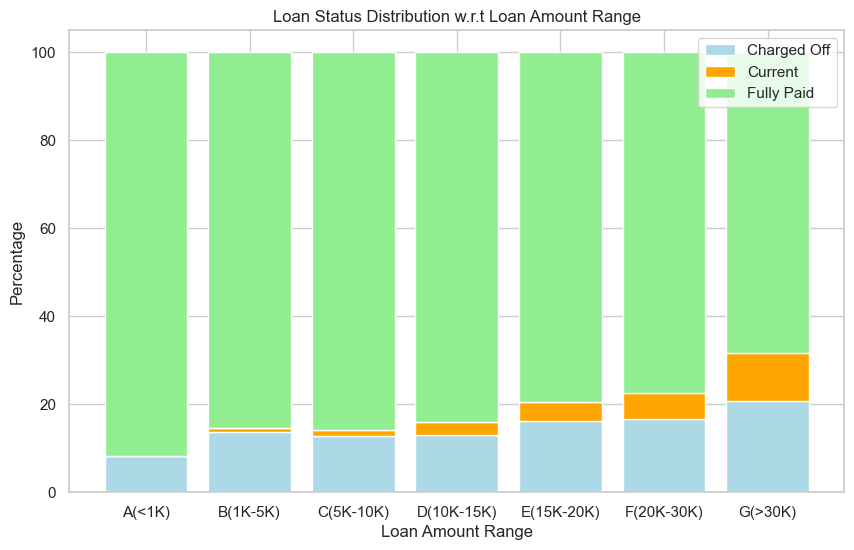

In [60]:
plt.figure(figsize=(10, 6))

charged_off = loandf_loan_amt_range['Charged Off%']
current = loandf_loan_amt_range['Current%']
fully_paid = loandf_loan_amt_range['Fully Paid %']

plt.bar(loandf_loan_amt_range.index, charged_off, label='Charged Off', color='lightblue')
plt.bar(loandf_loan_amt_range.index, current, bottom=charged_off, label='Current', color='orange')
plt.bar(loandf_loan_amt_range.index, fully_paid, bottom=charged_off + current, label='Fully Paid', color='lightgreen')

plt.xlabel('Loan Amount Range')
plt.ylabel('Percentage')
plt.title('Loan Status Distribution w.r.t Loan Amount Range')
plt.legend()

plt.show()

Chance for loan default is highest for loan amount greater than 30,000. 

### Installments

Lets check the impact of loan installment with loan default

In [61]:
print(loandf['installment'].max())
print(loandf['installment'].min())

1305.19
15.69


APPLY BUCKETING ON LOAN INSTALLMET BASED ON MIN AND MAX VALUE

In [62]:
def loan_installment_range(x):
    'Craete int_rate range'
    if x < 50:
        return "A(<50)"
    elif 50 <= x < 100:
        return "B(50-100)"
    elif 100 <= x < 200:
        return "C(100-200)"
    elif 200 <= x < 500:
        return "D(200-500)"
    elif 500 <= x < 750:
        return "E(500-750)"
    elif 750 <= x < 1000:
        return "F(750-1000)"
    else:
        return "G(>1000)"

loandf['loan_installment_range'] = loandf['installment'].apply(lambda x: loan_installment_range(x))  
loandf['loan_installment_range'].value_counts()

D(200-500)     19296
C(100-200)      9249
E(500-750)      5065
B(50-100)       3190
F(750-1000)     1840
A(<50)           842
G(>1000)         235
Name: loan_installment_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of installment_range for each loan_status

In [63]:
loandf_installment_range = pd.pivot_table(loandf, values='loan_amnt', index='loan_installment_range', columns='loan_status', aggfunc='count')
loandf_installment_range.loc[pd.isnull(loandf_installment_range['Current']), ['Current']] = 0
loandf_installment_range['Aggregate'] = loandf_installment_range['Charged Off'] + loandf_installment_range['Current'] + loandf_installment_range['Fully Paid']
loandf_installment_range['Charged Off%'] = round(loandf_installment_range['Charged Off']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range['Current%'] = round(loandf_installment_range['Current']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range['Fully Paid %'] = round(loandf_installment_range['Fully Paid']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loan_installment_range,,,,,,,
A(<50),135.0,10.0,697.0,842.0,16.03,1.19,82.78
B(50-100),464.0,47.0,2679.0,3190.0,14.55,1.47,83.98
C(100-200),1214.0,150.0,7885.0,9249.0,13.13,1.62,85.25
D(200-500),2673.0,608.0,16015.0,19296.0,13.85,3.15,83.00
E(500-750),792.0,244.0,4029.0,5065.0,15.64,4.82,79.55
F(750-1000),324.0,81.0,1435.0,1840.0,17.61,4.40,77.99
G(>1000),25.0,0.0,210.0,235.0,10.64,0.00,89.36


### Grade and Sub Grade

Grade Vs Loan Status

In [64]:
Grade_loanstatus = pd.crosstab(index=loandf["grade"],columns=loandf["loan_status"]).apply(lambda x: x/x.sum(), axis=1)
print(Grade_loanstatus)

loan_status  Charged Off   Current  Fully Paid
grade                                         
A               0.059693  0.003966    0.936341
B               0.118552  0.028702    0.852745
C               0.166337  0.032601    0.801062
D               0.210665  0.041832    0.747503
E               0.251583  0.062984    0.685433
F               0.304099  0.069590    0.626311
G               0.319620  0.053797    0.626582


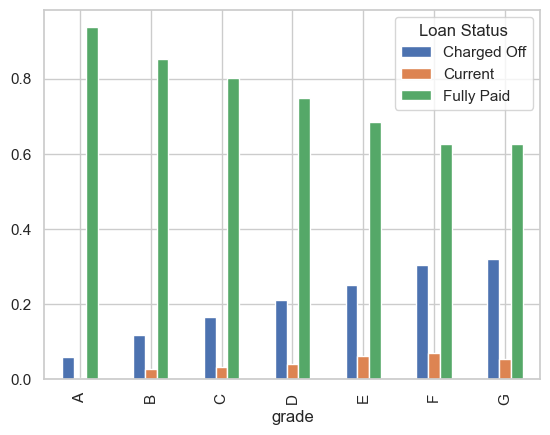

In [65]:
Grade_loanstatus.plot.bar(stacked=False)
plt.legend(title='Loan Status')

Loans to Grade 'G' - is prone to more default. Plot clearly shows from Grade A to G the Chargeoff i.e., Loan-default increases and 'Fully Paid' decreases 

In [66]:
Subgrade_loanstatus = pd.crosstab(index=loandf["sub_grade"],columns=loandf["loan_status"]).apply(lambda x: x/x.sum(), axis=1)
print(Subgrade_loanstatus)

loan_status  Charged Off   Current  Fully Paid
sub_grade                                     
A1              0.026339  0.000000    0.973661
A2              0.049072  0.000000    0.950928
A3              0.056906  0.000000    0.943094
A4              0.061677  0.004505    0.933818
A5              0.079139  0.009847    0.911014
B1              0.093443  0.018033    0.888525
B2              0.110841  0.027224    0.861935
B3              0.116901  0.031539    0.851560
B4              0.130971  0.029857    0.839172
B5              0.131657  0.032914    0.835429
C1              0.157303  0.037921    0.804775
C2              0.159622  0.039781    0.800597
C3              0.176586  0.026815    0.796599
C4              0.171521  0.024272    0.804207
C5              0.175379  0.026981    0.797639
D1              0.179377  0.000000    0.820623
D2              0.201039  0.045994    0.752967
D3              0.218244  0.048593    0.733163
D4              0.219164  0.064220    0.716616
D5           

<Figure size 1000x800 with 0 Axes>

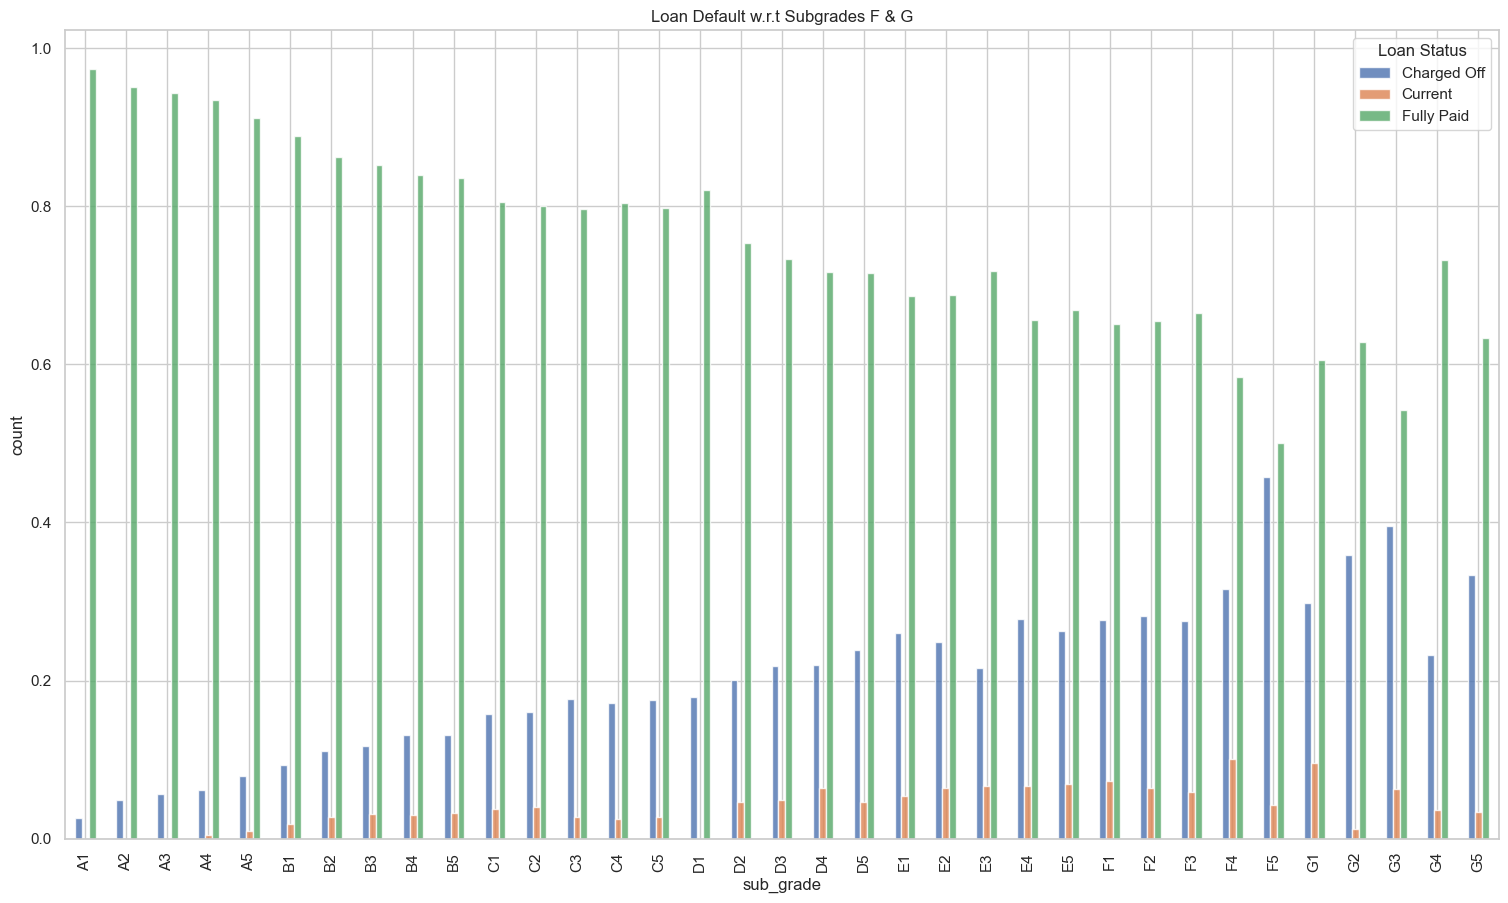

In [67]:
plt.figure(figsize=(10, 8))
ax = Subgrade_loanstatus.plot(alpha=0.8, kind='bar', stacked=False, figsize=(18.5, 10.5))
plt.title('Loan Default w.r.t Subgrades F & G')
plt.legend(title='Loan Status')
ax.set_ylabel('count')
plt.show()

## Outlier Analysis

<Axes: xlabel='int_rate_outlier'>

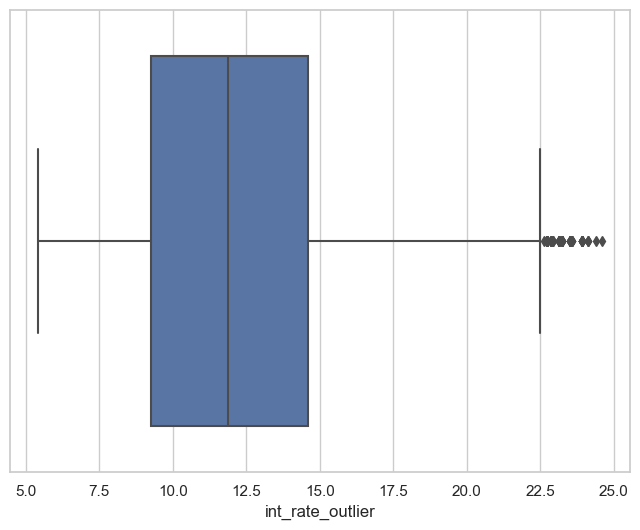

In [68]:

sns.set_style("whitegrid")
loandf["int_rate_outlier"] = loandf["int_rate"].str.replace('%','')
loandf["int_rate_outlier"] = loandf["int_rate_outlier"].astype(float)
plt.figure(figsize=(8, 6))
sns.boxplot(x=loandf["int_rate_outlier"])

In [69]:
def outliers(col_name):
    plt.figure(figsize=(8, 6))
    ax=sns.boxplot(x=loandf[col_name])

Check outliers for dti , annual_inc , loan_amnt

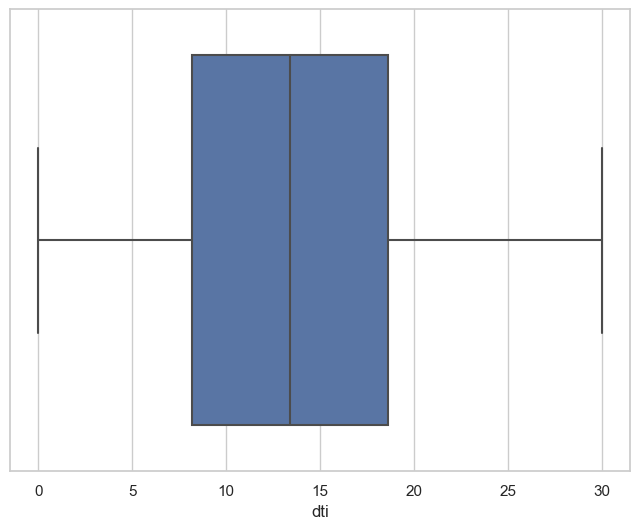

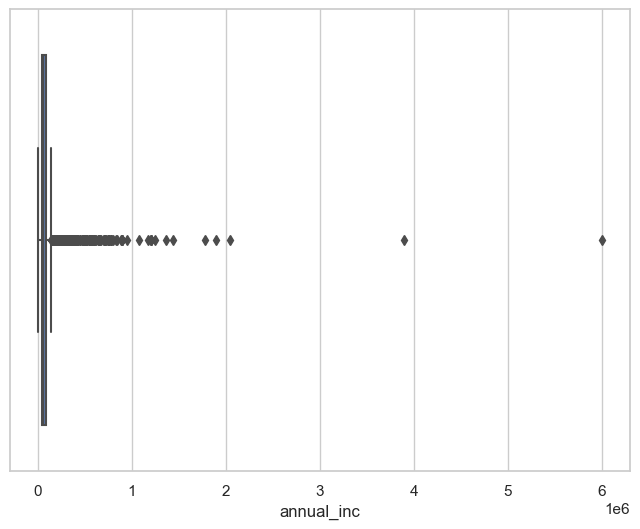

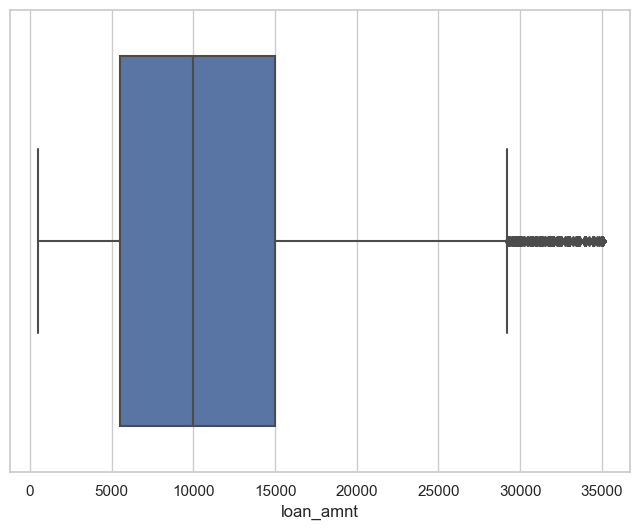

In [70]:

outliers("dti")

outliers('annual_inc')

outliers("loan_amnt")

## Handling the Outliers

Create new dataframe loandf_New from the original loandf

In [71]:
loandf_New = loandf
loandf_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

Remove these columns as we need not check for outliers in these columns

In [72]:
#filt_df = df.loc[:, df.columns!=[('User_id','Col1')] ]

out_filt_df = loandf_New.drop([ 
                    'id',
                    'member_id',
                    'int_rate',
                    'grade',
                    'sub_grade',
                    'emp_length',
                    'home_ownership',
                    'verification_status',
                    'issue_d',
                    'loan_status',
                    'purpose',
                    'addr_state',
                    'delinq_2yrs',
                    'inq_last_6mths',
                    'open_acc',
                    'pub_rec',
                    'revol_util',
                    'out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee',
                    'last_pymnt_d',
                    'last_credit_pull_d',
                    
                    'pub_rec_bankruptcies',
                    'loanPeriod',
                    'zip_code_num',
                    'dti_level','salary_range','int_rate%','int_rate_range',
                    'loan_amt_range','loan_installment_range','int_rate_outlier',
                    'total_acc'
                  ],axis=1)

In [73]:
out_filt_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,13648,5863.155187,5833.84,5000.00,863.16,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,1687,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,2956,3005.666844,3005.67,2400.00,605.67,649.91
3,10000,10000,10000.0,339.31,49200.0,20.00,5598,12231.890000,12231.89,10000.00,2214.92,357.48
4,3000,3000,3000.0,67.79,80000.0,17.94,27783,3513.330000,3513.33,2475.94,1037.39,67.79


##### Apply precentile 0.05 - 0.95 range to find outliers

In [74]:
low = .05
high = .95
quant_df = out_filt_df.quantile([low, high])
print(quant_df)

      loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0.05     2400.0       2400.0      1873.658000       71.246     24000.0   2.13   
0.95    25000.0      25000.0     24736.572264      762.996    142000.0  23.84   

      revol_bal   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0.05      321.8   1887.957036         1420.408         1339.842   
0.95    41656.4  30245.118530        29627.236        24999.982   

      total_rec_int  last_pymnt_amnt  
0.05        186.168           43.340  
0.95       7575.812        12183.944  


Apply low and high percentiles into the dataframe and apply Null to outliers values

In [75]:
out_filt_df = out_filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [76]:
out_filt_df.isnull().sum()*100/out_filt_df.shape[0] 

loan_amnt          12.957647
funded_amnt        11.872388
funded_amnt_inv     9.993957
installment         9.993957
annual_inc         10.552954
dti                10.014101
revol_bal           9.993957
total_pymnt         9.993957
total_pymnt_inv     9.993957
total_rec_prncp     9.993957
total_rec_int       9.993957
last_pymnt_amnt     9.993957
dtype: float64

We will decide whether or not to remove the outliers in our further analysis or keep it seperately and analyse them to see if we find some meaningful insights from them

In [77]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

# Correlation Analysis

In [78]:
cor_loanst = loandf[['loan_amnt', 'installment', 'int_rate%',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'addr_state', 'revol_bal',
                    'revol_util', 'loan_status']]
cor_loanst.head(10)

,loan_amnt,installment,int_rate%,annual_inc,dti,home_ownership,purpose,loanPeriod,addr_state,revol_bal,revol_util,loan_status
0,5000,162.87,10.65,24000.0,27.65,RENT,credit_card,36,AZ,13648,83.70%,Fully Paid
1,2500,59.83,15.27,30000.0,1.00,RENT,car,60,GA,1687,9.40%,Charged Off
2,2400,84.33,15.96,12252.0,8.72,RENT,small_business,36,IL,2956,98.50%,Fully Paid
3,10000,339.31,13.49,49200.0,20.00,RENT,other,36,CA,5598,21%,Fully Paid
4,3000,67.79,12.69,80000.0,17.94,RENT,other,60,OR,27783,53.90%,Current
5,5000,156.46,7.90,36000.0,11.20,RENT,wedding,36,AZ,7963,28.30%,Fully Paid
6,7000,170.08,15.96,47004.0,23.51,RENT,debt_consolidation,60,NC,17726,85.60%,Fully Paid
7,3000,109.43,18.64,48000.0,5.35,RENT,car,36,CA,8221,87.50%,Fully Paid
8,5600,152.39,21.28,40000.0,5.55,OWN,small_business,60,CA,5210,32.60%,Charged Off
9,5375,121.45,12.69,15000.0,18.08,RENT,other,60,TX,9279,36.50%,Charged Off


In [79]:
cor_loanst['revol_util'] = cor_loanst['revol_util'].str.rstrip('%').astype('float')
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['home_ownership', 'purpose', 'addr_state']

label_encoder = LabelEncoder()

for column in categorical_columns:
    cor_loanst[column] = label_encoder.fit_transform(cor_loanst[column])



In [80]:
cor_loanst.head(10)

,loan_amnt,installment,int_rate%,annual_inc,dti,home_ownership,purpose,loanPeriod,addr_state,revol_bal,revol_util,loan_status
0,5000,162.87,10.65,24000.0,27.65,3,1,36,3,13648,83.7,Fully Paid
1,2500,59.83,15.27,30000.0,1.00,3,0,60,10,1687,9.4,Charged Off
2,2400,84.33,15.96,12252.0,8.72,3,11,36,14,2956,98.5,Fully Paid
3,10000,339.31,13.49,49200.0,20.00,3,9,36,4,5598,21.0,Fully Paid
4,3000,67.79,12.69,80000.0,17.94,3,9,60,36,27783,53.9,Current
5,5000,156.46,7.90,36000.0,11.20,3,13,36,3,7963,28.3,Fully Paid
6,7000,170.08,15.96,47004.0,23.51,3,2,60,27,17726,85.6,Fully Paid
7,3000,109.43,18.64,48000.0,5.35,3,0,36,4,8221,87.5,Fully Paid
8,5600,152.39,21.28,40000.0,5.55,2,11,60,4,5210,32.6,Charged Off
9,5375,121.45,12.69,15000.0,18.08,3,9,60,42,9279,36.5,Charged Off


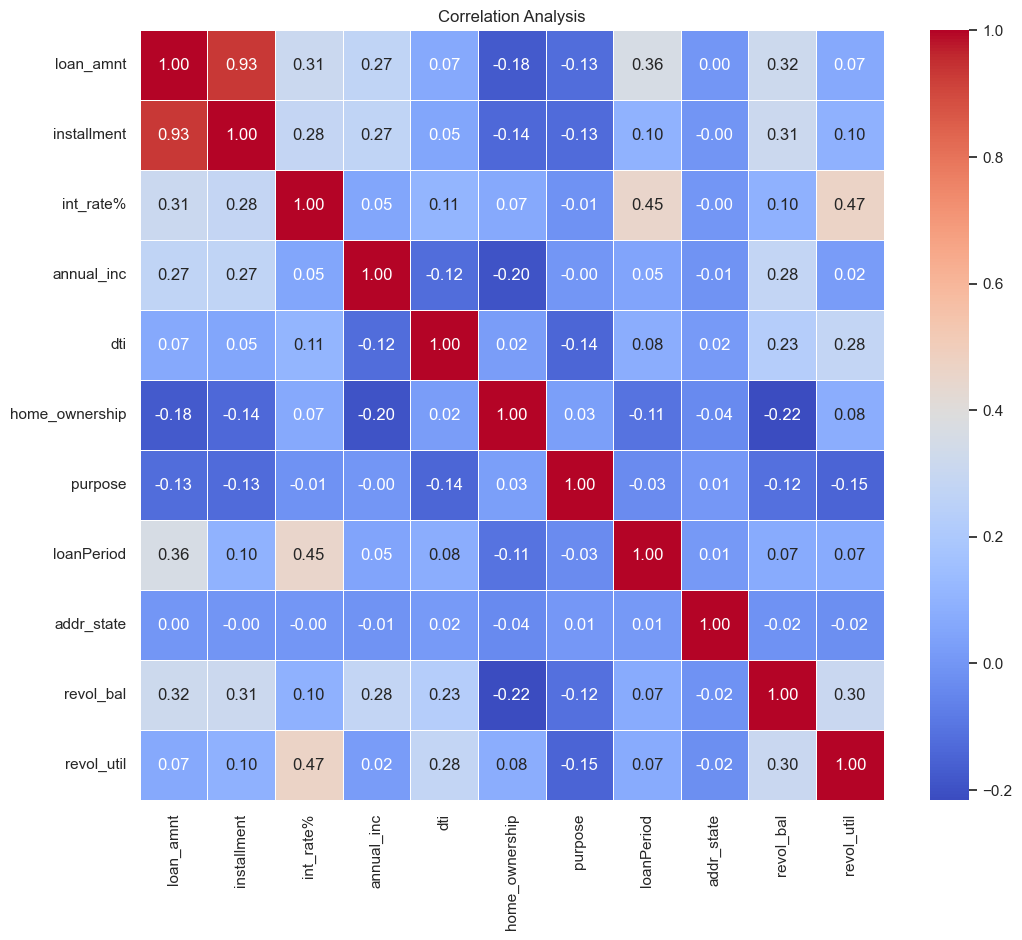

In [81]:
correlation_matrix = cor_loanst.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Analysis')

plt.show()

# Data Preparation

### Loan Status

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loandf['loan_status'] = label_encoder.fit_transform(loandf['loan_status'])

In [83]:
loandf = loandf[loandf['loan_status'] != 1]
loandf['loan_status'] = loandf['loan_status'].replace(2, 1)

In [84]:
predictor = loandf[['loan_amnt', 'installment', 'int_rate%',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'addr_state', 'revol_bal',
                    'revol_util']]
target = loandf['loan_status']

In [85]:
predictor['revol_util'] = predictor['revol_util'].str.rstrip('%').astype('float')

In [86]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['home_ownership', 'purpose', 'addr_state']

label_encoder = LabelEncoder()

for column in categorical_columns:
    predictor[column] = label_encoder.fit_transform(predictor[column])


In [87]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
predictor = imputer.fit_transform(predictor)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.2, random_state=42)


In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30861, 11)
(30861,)
(7716, 11)
(7716,)


### Interest Rate

In [90]:
loandf['int_rate_range'] = label_encoder.fit_transform(loandf['int_rate_range'])

In [91]:
int_predictor = loandf[['loan_amnt', 'installment', 'loan_status',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'addr_state', 'revol_bal',
                    'revol_util']]
int_target = loandf['int_rate_range']

In [92]:
int_predictor['revol_util'] = int_predictor['revol_util'].str.rstrip('%').astype('float')

In [93]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['home_ownership', 'purpose', 'addr_state']

label_encoder = LabelEncoder()

for column in categorical_columns:
    int_predictor[column] = label_encoder.fit_transform(int_predictor[column])

In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
int_predictor = imputer.fit_transform(int_predictor)

In [95]:
from sklearn.model_selection import train_test_split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(int_predictor, int_target, test_size=0.2, random_state=42)

In [96]:
print(X_train_int.shape)
print(y_train_int.shape)
print(X_test_int.shape)
print(y_test_int.shape)

(30861, 11)
(30861,)
(7716, 11)
(7716,)


# ML Models

### XGBOOST

In [97]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

#### Loan Status

Accuracy: 0.8578
Confusion Matrix:
[[   9 1086]
 [  11 6610]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      1095
           1       0.86      1.00      0.92      6621

    accuracy                           0.86      7716
   macro avg       0.65      0.50      0.47      7716
weighted avg       0.80      0.86      0.79      7716



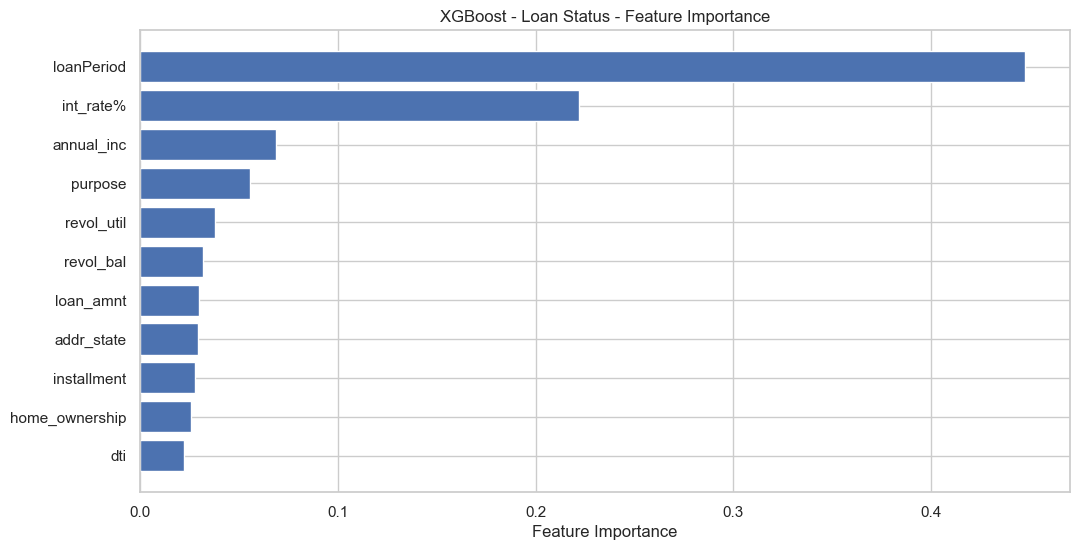

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


feature_names = ['loan_amnt', 'installment', 'int_rate%', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'loanPeriod', 'addr_state', 'revol_bal', 'revol_util']


feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost - Loan Status - Feature Importance")
plt.show()

#### Interest Rate

Accuracy: 0.8898
Confusion Matrix:
[[2190  207    3    0]
 [ 160 3418  140    1]
 [   5  263 1184   12]
 [   1    4   54   74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2400
           1       0.88      0.92      0.90      3719
           2       0.86      0.81      0.83      1464
           3       0.85      0.56      0.67       133

    accuracy                           0.89      7716
   macro avg       0.88      0.80      0.83      7716
weighted avg       0.89      0.89      0.89      7716



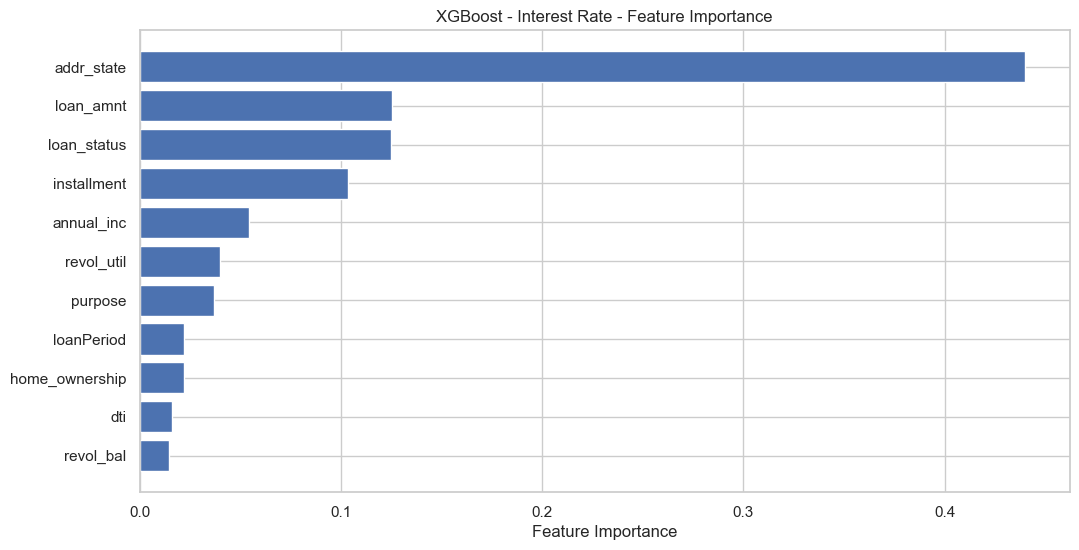

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_int, y_train_int)

y_pred_int = xgb_model.predict(X_test_int)


accuracy_XG = accuracy_score(y_test_int, y_pred_int)
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
classification_rep = classification_report(y_test_int, y_pred_int)

print(f"Accuracy: {accuracy_XG:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


feature_names = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'loanPeriod', 'addr_state', 'revol_bal', 'revol_util', 'loan_status']


feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost - Interest Rate - Feature Importance")
plt.show()

### GBM Model

#### Loan Status

Accuracy: 0.8572
Confusion Matrix:
[[  11 1084]
 [  18 6603]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.01      0.02      1095
           1       0.86      1.00      0.92      6621

    accuracy                           0.86      7716
   macro avg       0.62      0.50      0.47      7716
weighted avg       0.79      0.86      0.79      7716



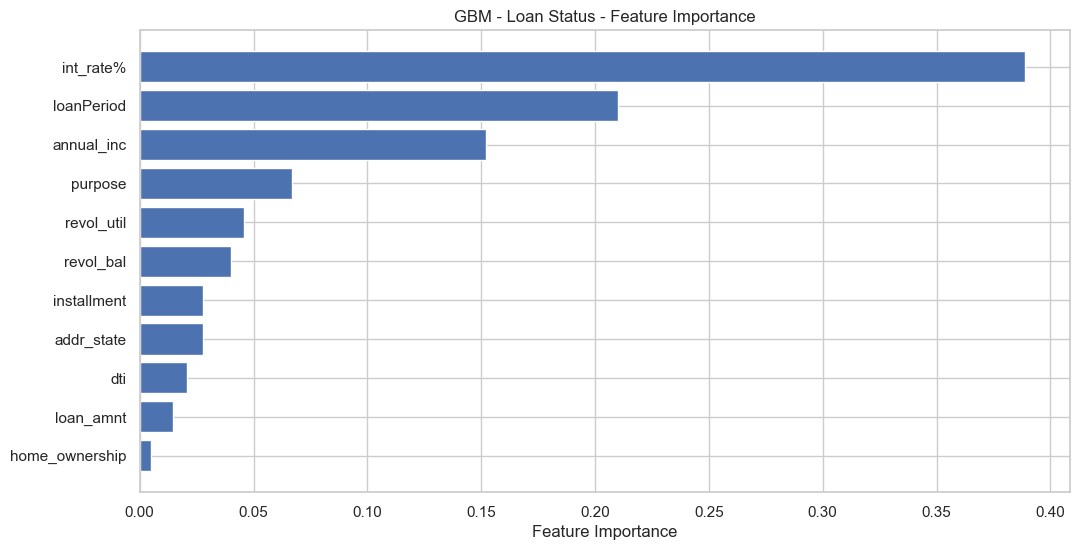

In [100]:
from sklearn.ensemble import GradientBoostingClassifier


sample_weights = [1.0] * len(y_train)


gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train, sample_weight=sample_weights)


y_pred = gbm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


feature_names = ['loan_amnt', 'installment', 'int_rate%', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'loanPeriod', 'addr_state', 'revol_bal', 'revol_util']


feature_importance = gbm_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("GBM - Loan Status - Feature Importance")
plt.show()

#### Interest Rate

Accuracy: 0.7446
Confusion Matrix:
[[1788  598   14    0]
 [ 382 3110  227    0]
 [  63  606  784   11]
 [   3   14   53   63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2400
           1       0.72      0.84      0.77      3719
           2       0.73      0.54      0.62      1464
           3       0.85      0.47      0.61       133

    accuracy                           0.74      7716
   macro avg       0.77      0.65      0.69      7716
weighted avg       0.75      0.74      0.74      7716



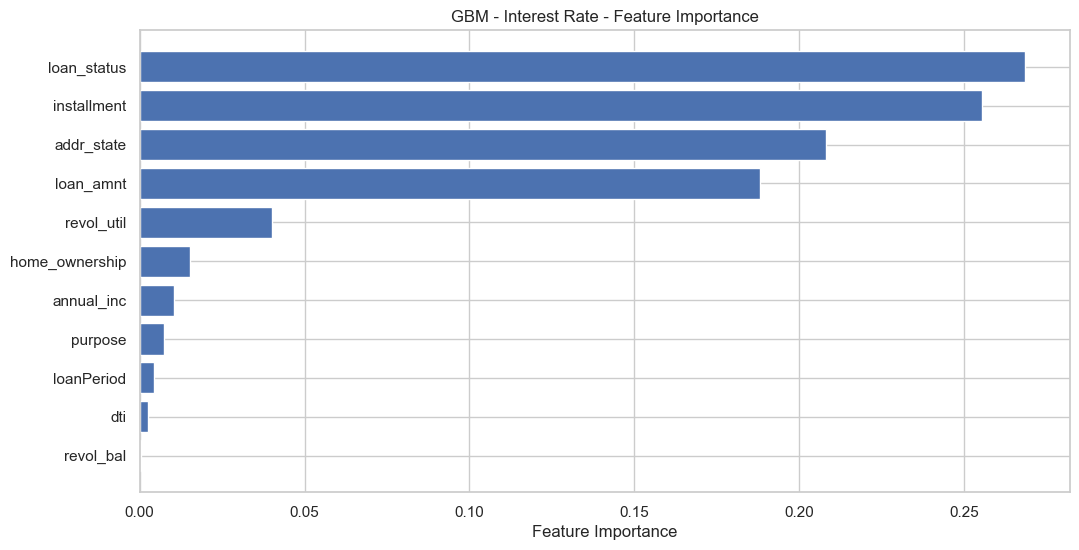

In [101]:
sample_weights = [1.0] * len(y_train_int)


gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train_int, y_train_int, sample_weight=sample_weights)


y_pred_int = gbm_model.predict(X_test_int)


accuracy_GBM = accuracy_score(y_test_int, y_pred_int)
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
classification_rep = classification_report(y_test_int, y_pred_int)

print(f"Accuracy: {accuracy_GBM:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


feature_names = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'loanPeriod', 'addr_state', 'revol_bal', 'revol_util', 'loan_status']


feature_importance = gbm_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("GBM - Interest Rate - Feature Importance")
plt.show()

### Decision Trees

#### Loan Status

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7596
Confusion Matrix:
[[ 238  857]
 [ 998 5623]]
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.22      0.20      1095
           1       0.87      0.85      0.86      6621

    accuracy                           0.76      7716
   macro avg       0.53      0.53      0.53      7716
weighted avg       0.77      0.76      0.77      7716



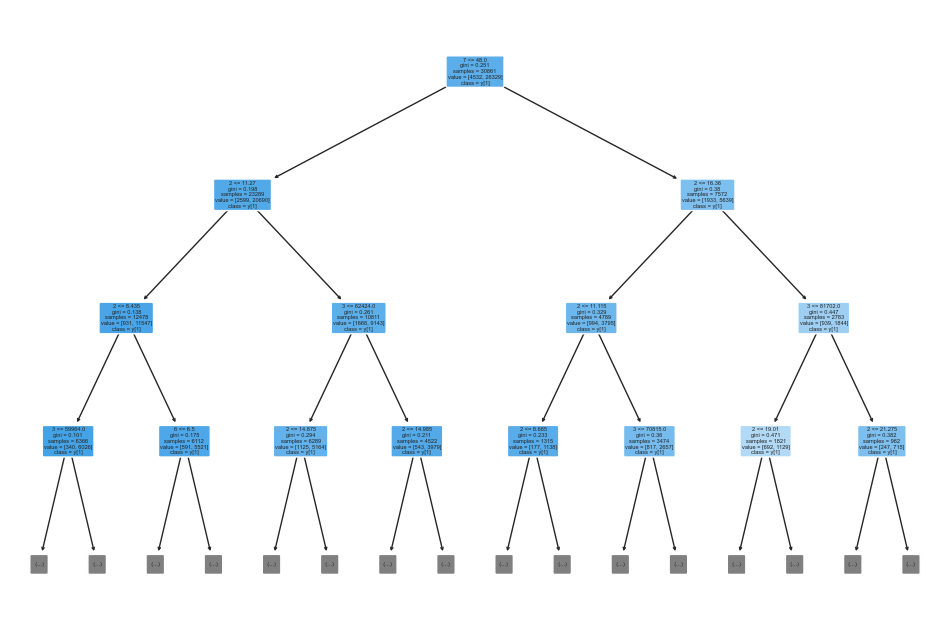

In [103]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_rules = export_text(dt_model, feature_names=list(range(X_train.shape[1])))

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=list(range(X_train.shape[1])), class_names=True, filled=True, rounded=True, max_depth=3)
plt.show()



#### Interest Rate

In [104]:
dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train_int, y_train_int)


y_pred_int = dt_model.predict(X_test)


accuracy_DT = accuracy_score(y_test_int, y_pred_int)
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
classification_rep = classification_report(y_test_int, y_pred_int)

print(f"Accuracy: {accuracy_DT:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7880
Confusion Matrix:
[[1941  408   51    0]
 [ 406 3005  298   10]
 [  44  314 1061   45]
 [   2    8   50   73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2400
           1       0.80      0.81      0.81      3719
           2       0.73      0.72      0.73      1464
           3       0.57      0.55      0.56       133

    accuracy                           0.79      7716
   macro avg       0.73      0.72      0.73      7716
weighted avg       0.79      0.79      0.79      7716



### Random Forest

#### Loan Status

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{classification_rep_rf}")


Random Forest Accuracy: 0.8554
Random Forest Confusion Matrix:
[[  36 1059]
 [  57 6564]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.03      0.06      1095
           1       0.86      0.99      0.92      6621

    accuracy                           0.86      7716
   macro avg       0.62      0.51      0.49      7716
weighted avg       0.79      0.86      0.80      7716



In [106]:
#%pip install scikit-learn pydotplus


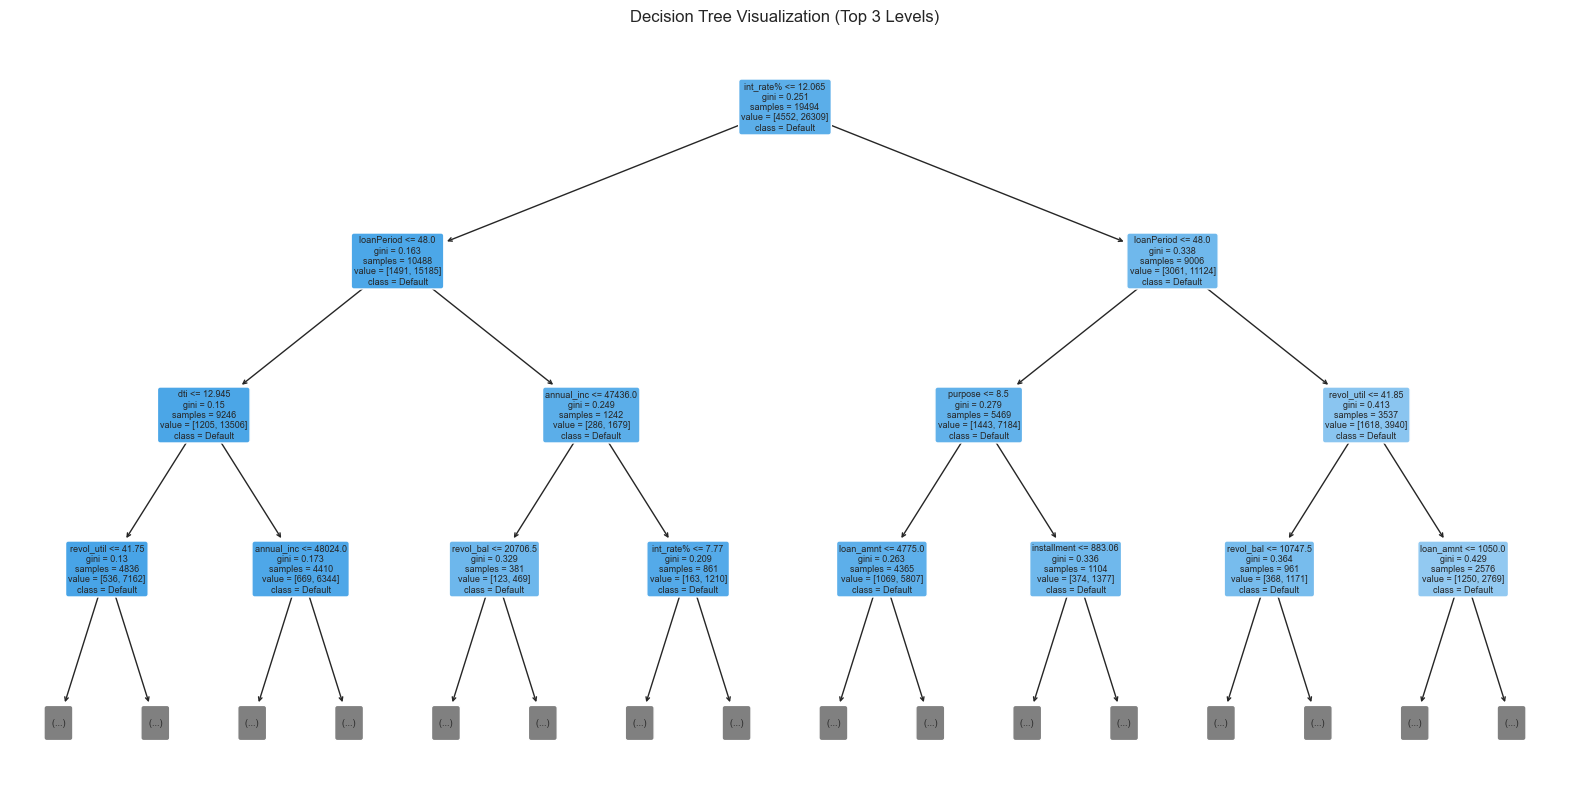

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_to_plot = rf_model.estimators_[20]


depth_limit = 3  


plt.figure(figsize=(20, 10)) 
plot_tree(tree_to_plot, feature_names=['loan_amnt', 'installment', 'int_rate%', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'loanPeriod', 'addr_state', 'revol_bal', 'revol_util'], class_names=['Not Default', 'Default'], filled=True, rounded=True, max_depth=depth_limit)
plt.title(f'Decision Tree Visualization (Top {depth_limit} Levels)')
plt.show()


#### Interest Rate

In [108]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_int, y_train_int)


y_pred_rf_int = rf_model.predict(X_test_int)


accuracy_rf = accuracy_score(y_test_int, y_pred_rf_int)
conf_matrix_rf = confusion_matrix(y_test_int, y_pred_rf_int)
classification_rep_rf = classification_report(y_test_int, y_pred_rf_int)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{classification_rep_rf}")

Random Forest Accuracy: 0.7400
Random Forest Confusion Matrix:
[[1770  623    7    0]
 [ 427 3089  203    0]
 [  26  620  816    2]
 [   0   21   77   35]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2400
           1       0.71      0.83      0.77      3719
           2       0.74      0.56      0.64      1464
           3       0.95      0.26      0.41       133

    accuracy                           0.74      7716
   macro avg       0.80      0.60      0.64      7716
weighted avg       0.75      0.74      0.73      7716



### Comparison of Models

#### Loan Status

In [109]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)


models = {
    'GBM': gbm_model,
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}


metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
   
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    
   
    accuracy = accuracy_score(y_train, y_pred_cv)
    precision = precision_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    f1 = f1_score(y_train, y_pred_cv)
    
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


comparison_table = pd.DataFrame(metrics)
comparison_table = comparison_table.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


print(comparison_table)


           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.853213   0.854536  0.997797  0.920627
1            GBM  0.852954   0.854937  0.996772  0.920422
2  Random Forest  0.851009   0.856258  0.991872  0.919089
3  Decision Tree  0.755549   0.864403  0.846215  0.855213


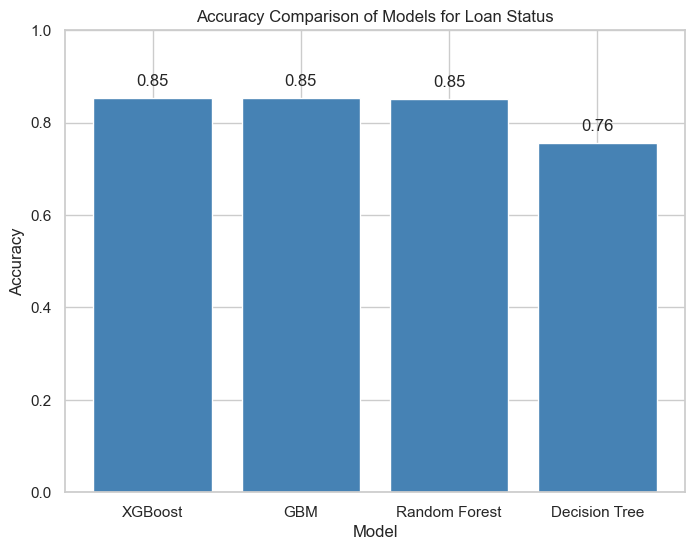

In [110]:
plt.figure(figsize=(8, 6))
plt.bar(comparison_table['Model'], comparison_table['Accuracy'], color='steelblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models for Loan Status')
plt.ylim(0, 1)

for i, value in enumerate(comparison_table['Accuracy']):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()


#### Interest Rate

           Model  Accuracy
0  Decision Tree  0.787973
1            GBM  0.744557
2        XGBoost  0.889839
3  Random Forest  0.740021


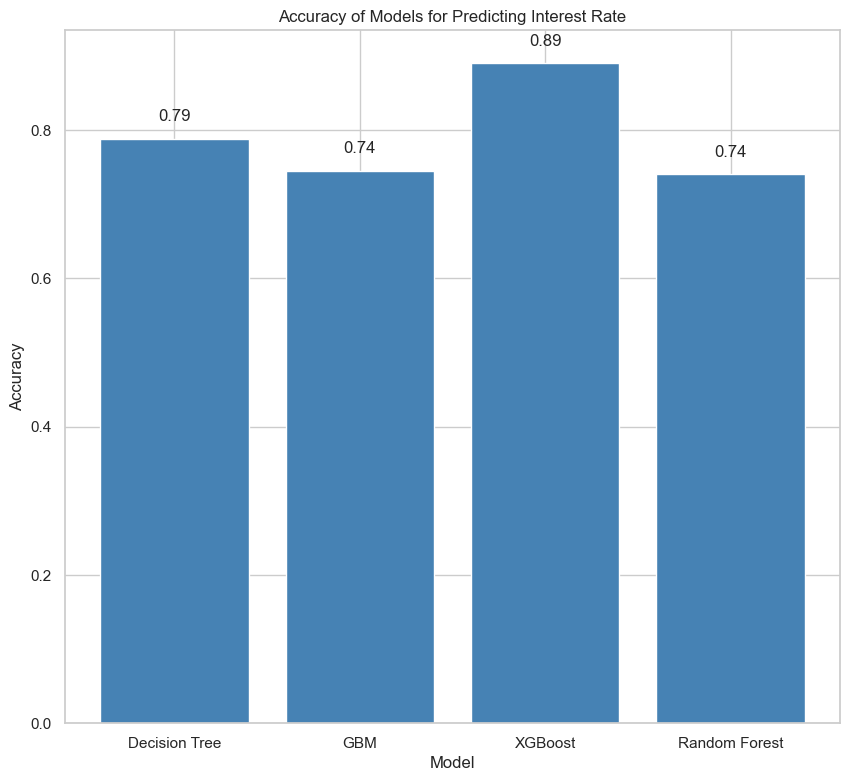

In [111]:
models1 = ['Decision Tree', 'GBM', 'XGBoost', 'Random Forest']

accuracy_t = [accuracy_DT, accuracy_GBM, accuracy_XG, accuracy_rf]

data = {
    'Model': models1,
    'Accuracy': [accuracy_DT, accuracy_GBM, accuracy_XG, accuracy_rf]
}

df = pd.DataFrame(data)

print(df)


plt.figure(figsize=(10, 9))
plt.bar(models1, accuracy_t, color='steelblue')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models for Predicting Interest Rate')

for i, value in enumerate(accuracy_t):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()